In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
from scipy import signal
from scipy import stats

In [2]:
ds = xr.open_dataset(r'E:\Work\Python\test9\sst.mnmean.nc')['sst']
dt = xr.open_dataset(r'E:\Work\Python\test13-14\air.2m.mon.mean.nc')['air']

In [3]:
ds_w = ds.loc[ds.time.dt.month.isin([12,1,2])].loc['1979-12-01':'2020-02-01', :, :]
en_w = ds_w.loc['1979-12-01':'2020-02-01', 5:-5, 190:240]
# ds_w = ds_w.groupby(ds_w.time.dt.year).mean('time')
en_w_mean = en_w.mean(dim=['lat', 'lon'], skipna=True)
en_w_mean

<xarray.DataArray 'sst' (time: 123)>
array([27.114096, 27.087997, 26.980043, 26.646154, 26.18865 , 26.123835,
       26.402405, 26.678442, 26.599535, 28.78971 , 28.883408, 28.688202,
       25.575691, 25.878864, 26.569704, 25.260462, 25.392792, 26.036903,
       26.192165, 25.892822, 26.065239, 27.714317, 27.676153, 27.889612,
       27.543186, 27.451445, 27.037136, 24.63979 , 24.590872, 25.292274,
       26.464603, 26.563663, 26.97569 , 26.95802 , 27.038706, 27.078781,
       28.275972, 28.370167, 28.525696, 26.448334, 26.696604, 27.17254 ,
       26.760908, 26.647821, 26.817965, 27.851439, 27.570042, 27.494555,
       25.661026, 25.698336, 25.904848, 25.95729 , 26.021996, 26.390978,
       28.885242, 28.925295, 28.78647 , 24.920568, 24.869535, 25.443514,
       24.867447, 24.79238 , 25.22552 , 25.68795 , 25.822958, 26.135063,
       26.195879, 26.40189 , 26.72272 , 27.968288, 27.155474, 27.402447,
       27.038446, 26.827356, 26.998632, 27.342428, 27.210335, 27.121643,
       25.679579, 25.640717, 26.090069, 27.741203, 27.253424, 26.895954,
       25.022533, 24.873163, 25.099678, 25.74311 , 25.665155, 25.973442,
       28.333698, 28.064514, 28.013622, 24.99878 , 25.018318, 25.663513,
       25.546192, 25.685518, 26.090374, 26.344267, 26.032532, 26.2537  ,
       26.43963 , 26.046413, 26.138044, 27.304697, 27.072306, 27.199463,
       29.25799 , 29.116169, 29.01513 , 26.109188, 26.12802 , 26.680431,
       25.609129, 25.58012 , 25.987247, 27.49931 , 27.21324 , 27.489916,
       27.131964, 27.16387 , 27.139446], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-12-01 1980-01-01 ... 2020-02-01

In [4]:
nino_51 = signal.savgol_filter(en_w_mean, 5, 1)
nino_52 = signal.savgol_filter(en_w_mean, 5, 2)
nino_111 = signal.savgol_filter(en_w_mean, 11, 1)
nino_112 = signal.savgol_filter(en_w_mean, 11, 2)

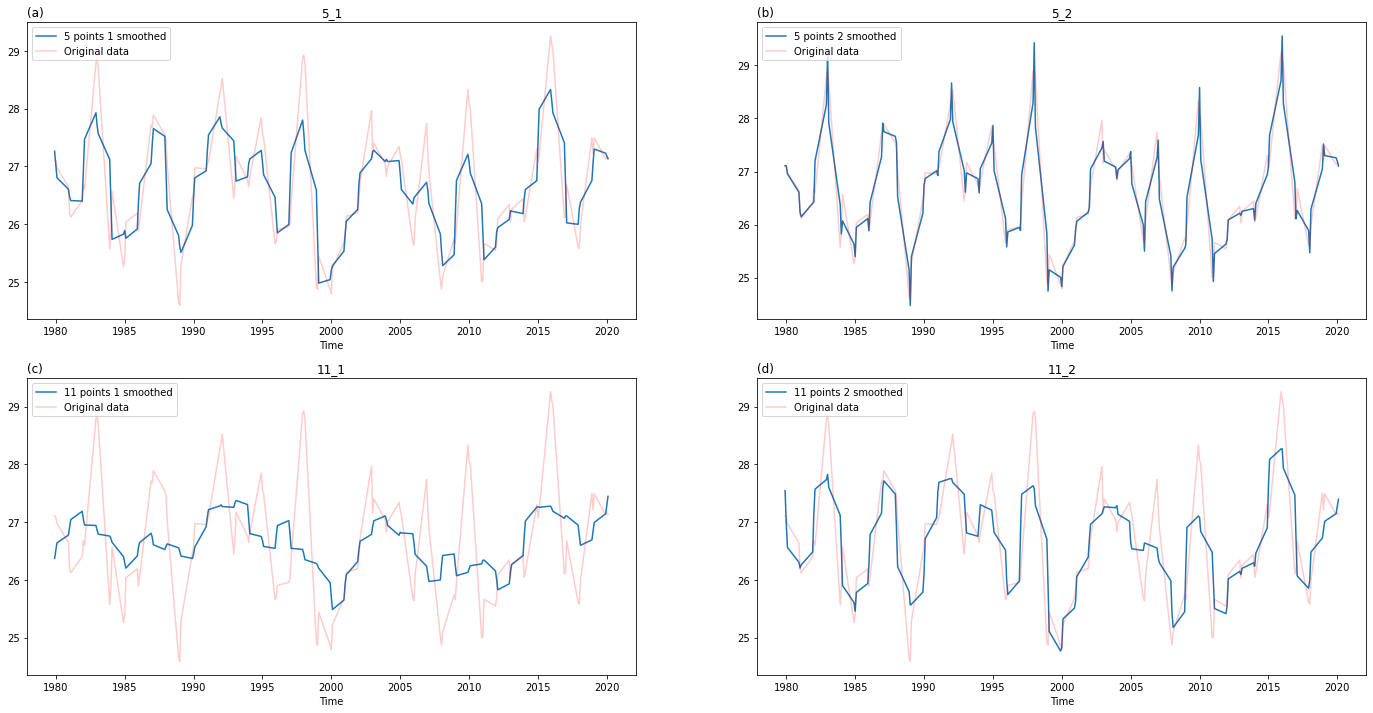

In [5]:
fig = plt.figure(figsize=(24, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_xlabel('Time')
ax1.plot(en_w_mean['time'], nino_51, label='5 points 1 smoothed')
# ax1_1 = ax1.twinx()
ax1.plot(en_w_mean['time'], en_w_mean, color='r', alpha=0.2, label='Original data')
ax1.set_title('5_1', loc='center')
ax1.set_title('(a)', loc='left')
ax1.legend(loc='upper left', fontsize=10)
                 
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_xlabel('Time')
ax2.plot(en_w_mean['time'], nino_52, label='5 points 2 smoothed')
# ax2_1 = ax2.twinx()
ax2.plot(en_w_mean['time'], en_w_mean, color='r', alpha=0.2, label='Original data')
ax2.set_title('5_2', loc='center')
ax2.set_title('(b)', loc='left')
ax2.legend(loc='upper left', fontsize=10)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_xlabel('Time')
ax3.plot(en_w_mean['time'], nino_111, label='11 points 1 smoothed')
# ax3_1 = ax3.twinx()
ax3.plot(en_w_mean['time'], en_w_mean, color='r', alpha=0.2, label='Original data')
ax3.set_title('11_1', loc='center')
ax3.set_title('(c)', loc='left')
ax3.legend(loc='upper left', fontsize=10)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_xlabel('Time')
ax4.plot(en_w_mean['time'], nino_112, label='11 points 2 smoothed')
# ax4_1 = ax4.twinx()
ax4.plot(en_w_mean['time'], en_w_mean, color='r', alpha=0.2, label='Original data')
ax4.set_title('11_2', loc='center')
ax4.set_title('(d)', loc='left')
ax4.legend(loc='upper left', fontsize=10)

plt.savefig(r'E:\Work\Python\test15\Five-point-smoothing-ENSO.png', format='png')
# plt.show()

In [19]:
# 求相关系数
def relate(x, ds):
    x = x - x.mean()
    y = ds - ds.mean(dim='time')
    x = x.reshape((len(x), 1, 1))
    up = np.sum(x * y, axis=0) / len(x)
    down = (np.sqrt(np.sum(x ** 2)) * np.sqrt(np.sum(y ** 2, axis=0))) / len(x)
    # 相关系数
    r = up / down
    return r

In [7]:
en_w_std = (en_w_mean - en_w_mean.mean()) / en_w_mean.std()
ds_w_std = (ds_w - ds_w.mean(dim='time')) / ds_w.std(dim='time', skipna=True)

D:\Program Files\Anaconda\envs\python39\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [8]:
win_r = relate(np.array(en_w_std), ds_w_std)
t = (win_r * np.sqrt(len(en_w_std) - 2)) / np.sqrt(1 - np.power(win_r, 2))
t

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-0.49411637, -0.49411646, -0.4941164 , ..., -0.4941164 ,
        -0.4941164 , -0.49411646],
       [-0.4941164 , -0.49411637,         nan, ...,         nan,
        -0.4941164 , -0.49411637],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [20]:
win_r

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-0.04487442, -0.04487443, -0.04487442, ..., -0.04487442,
        -0.04487442, -0.04487443],
       [-0.04487442, -0.04487442,         nan, ...,         nan,
        -0.04487442, -0.04487442],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [9]:
lat_t = t.lat.data
lon_t = t.lon.data

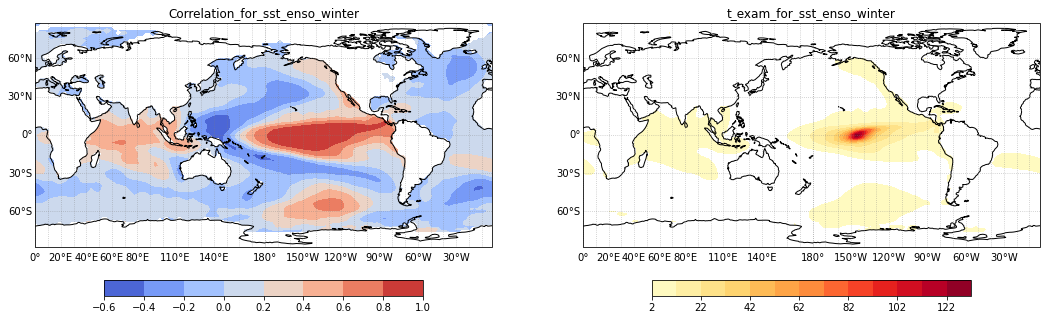

In [23]:
fig = plt.figure(figsize=(18, 6))
ax8 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax8.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax8.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax8.contourf(lon_t.data, lat_t.data, win_r, cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax8.set_title('Correlation_for_sst_enso_winter')

ax5 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
# 海岸线
ax5.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax5.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax5.contourf(lon_t.data, lat_t.data, t, levels=np.arange(1.984, 140, 10), cmap='YlOrRd', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax5.set_title('t_exam_for_sst_enso_winter')
plt.savefig(r'E:\Work\Python\test15\r&t_exam_for_sst_enso_winter.png', format='png')

In [11]:
# 读取elnino 和 lanina 的年份
nino = np.array([1979, 1982, 1986, 1991, 1994, 1997, 2002, 2004, 2006, 2009, 2014])
nina = np.array([1984, 1988, 1995, 1998, 2000, 2007, 2010, 2011])

In [12]:
dt_w = dt.loc[dt.time.dt.month.isin([12,1,2])].loc['1979-12-01':'2020-02-01', 2, :, :]
# del dt_w['level']
dt_w

<xarray.DataArray 'air' (time: 123, lat: 94, lon: 192)>
[2219904 values with dtype=float32]
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-12-01 1980-01-01 ... 2020-02-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

In [13]:
# 合成分析
nino_air = dt_w.loc[dt_w.time.dt.year.isin(nino)]
nina_air = dt_w.loc[dt_w.time.dt.year.isin(nina)]

nino_combine = nino_air.mean(dim='time') - dt_w.mean(dim='time')
nina_combine = nina_air.mean(dim='time') - dt_w.mean(dim='time')
nino_combine

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-0.5221863 , -0.45272827, -0.47309875, ..., -0.46481323,
        -0.4406128 , -0.44732666],
       [-0.5935669 , -0.5215759 , -0.5181427 , ..., -0.6169281 ,
        -0.5812073 , -0.5684204 ],
       [-0.65411377, -0.6185608 , -0.60853577, ..., -0.68310547,
        -0.6483612 , -0.64427185],
       ...,
       [-0.24247742, -0.27375793, -0.30455017, ..., -0.15260315,
        -0.18382263, -0.21502686],
       [-0.2574768 , -0.27209473, -0.28648376, ..., -0.21920776,
        -0.2341919 , -0.24458313],
       [-0.17399597, -0.17715454, -0.18104553, ..., -0.16537476,
        -0.16845703, -0.17041016]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [14]:
lon_c = nino_combine.lon.data
lat_c = nino_combine.lat.data

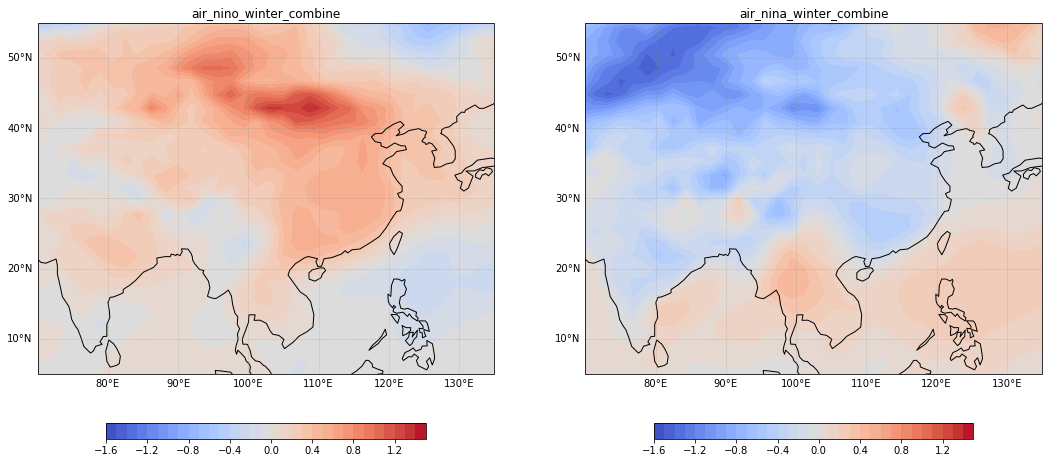

In [15]:
fig = plt.figure(figsize=(18, 9))
ax6 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=105))
ax6.set_extent([70, 135, 5, 55], crs=ccrs.PlateCarree())
# 海岸线
ax6.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax6.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax6.contourf(lon_c, lat_c, nino_combine, levels=np.arange(-1.6, 1.6, 0.1), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax6.set_title('air_nino_winter_combine')

ax7 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=105))
ax7.set_extent([70, 135, 5, 55], crs=ccrs.PlateCarree())
# 海岸线
ax7.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax7.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax7.contourf(lon_c, lat_c, nina_combine, levels=np.arange(-1.6, 1.6, 0.1), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax7.set_title('air_nina_winter_combine')
plt.savefig(r'E:\Work\Python\test15\air_nino&nina_winter.png', format='png')

In [16]:
nino_t,_ = stats.ttest_ind(nino_air, dt_w, equal_var=True)
nina_t,_ = stats.ttest_ind(nina_air, dt_w, equal_var=True)
nino_t

array([[-0.6817391 , -0.5942326 , -0.614254  , ..., -0.6146088 ,
        -0.58251935, -0.5897365 ],
       [-0.72733814, -0.6389167 , -0.6391793 , ..., -0.7716983 ,
        -0.7232377 , -0.70021045],
       [-0.73919415, -0.69185925, -0.6740047 , ..., -0.81051105,
        -0.7555075 , -0.7398834 ],
       ...,
       [-0.24293916, -0.2685839 , -0.29271853, ..., -0.16298941,
        -0.19221886, -0.22010085],
       [-0.25532085, -0.2666682 , -0.27763656, ..., -0.22514655,
        -0.23769988, -0.24539429],
       [-0.17452171, -0.17697072, -0.18008387, ..., -0.16792724,
        -0.17033815, -0.17161676]], dtype=float32)

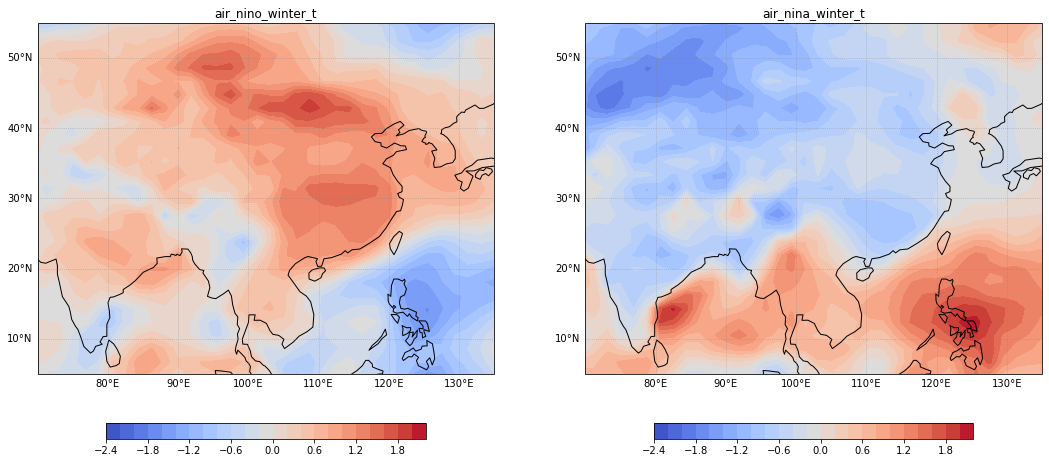

In [17]:
fig = plt.figure(figsize=(18, 9))
ax6 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=105))
ax6.set_extent([70, 135, 5, 55], crs=ccrs.PlateCarree())
# 海岸线
ax6.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax6.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax6.contourf(lon_c, lat_c, nino_t, levels=np.arange(-2.4, 2.4, 0.2), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax6.set_title('air_nino_winter_t')

ax7 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=105))
ax7.set_extent([70, 135, 5, 55], crs=ccrs.PlateCarree())
# 海岸线
ax7.coastlines('110m')
# 标注坐标轴
majorticks = MultipleLocator(10)
ax7.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
             linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
shaded = ax7.contourf(lon_c, lat_c, nina_t, levels=np.arange(-2.4, 2.4, 0.2), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig.colorbar(shaded, extendrect='True', pad=0.1, fraction=0.1, shrink=0.7, location='bottom')
ax7.set_title('air_nina_winter_t')
plt.savefig(r'E:\Work\Python\test15\air_nino&nina_winter_t.png', format='png')